# Fit Log

In [1]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT

Welcome to JupyROOT 6.24/06


### Read DataFrames

In [2]:
df_data = pd.read_csv("../data-source/5-10-21/logaritmico/data.csv")
df_data
df_errors = 5./100. * df_data # 5 %
df_errors[:10] += 0.001 # 1dgt
df_errors[10:] += 0.01 # 1dgt
df_errors
df_data

,Vin [V],Vout [V]
0,0.568,-0.548
1,0.880,-0.564
2,1.099,-0.577
3,1.377,-0.586
4,1.642,-0.596
5,2.047,-0.605
6,2.498,-0.613
7,3.035,-0.620
8,3.664,-0.627
9,4.080,-0.630


### Convert to arrays of uncertainties

In [3]:
Vin_arr = pair_dat_err(df_data['Vin [V]'], df_errors['Vin [V]'])
Vout_arr = pair_dat_err(df_data['Vout [V]'], df_errors['Vout [V]'])

### Canvas

In [4]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [7]:
fit_log_graph_err = uncertainties_to_root_graph_errors(Vin_arr, Vout_arr)

fit_log_graph_err.SetTitle("Bode Gain 1")
fit_log_graph_err.GetXaxis().SetTitle("f [Hz]")
fit_log_graph_err.GetYaxis().SetTitle("G [dB]")
fit_log_graph_err.SetMarkerStyle(21)
fit_log_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [18]:
function_formula = "- 2 * [0] * log(x / (1995 * [1]))"
fit_f = ROOT.TF1("fit1", function_formula)

In [19]:
fit_f.SetLineColor(4)

In [23]:
fit_f.SetParName(0, "V_T")
fit_f.SetParName(1, "I_0")
fit_f.SetParameter(0, 0.026)
fit_f.SetParameter(1, 1e-9)

### Draw

 FCN=0.472105 FROM MINOS     STATUS=PROBLEMS       85 CALLS        1617 TOTAL
                     EDM=1.55879e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  V_T          1.83575e-02   3.33296e-03          -nan          -nan
   2  I_0          7.91971e-11   2.45976e-10   2.45976e-10          -inf


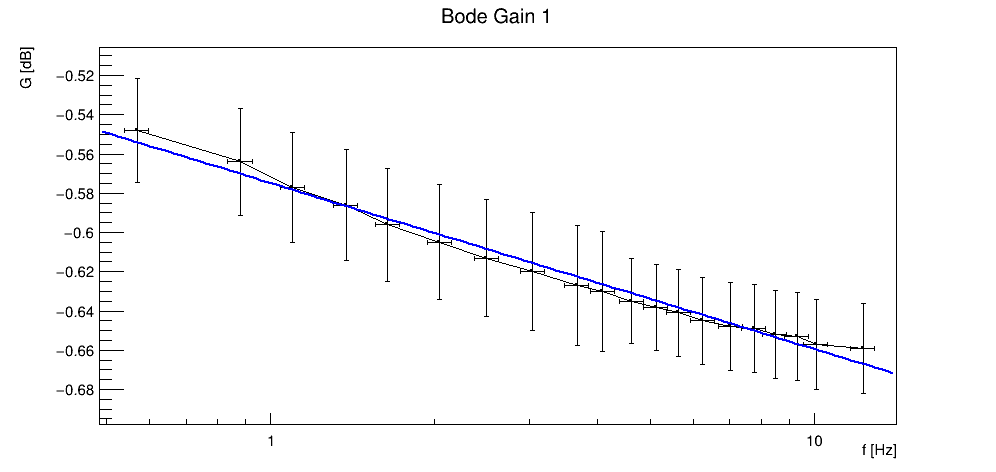

In [24]:
canvas.Draw()
fit_log_graph_err.Draw()
fit_log_graph_err.Fit(fit_f, "MSE")